In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the YM dataset (this datased was previously created with pandas to better organize the sample's data)
samples_abs_df = pd.read_csv('YM2_dataset.csv')
samples_abs_df['abs_avg'] = samples_abs_df['abs_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_std'] = samples_abs_df['abs_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['freq'] = samples_abs_df['freq'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_avg'] = samples_abs_df['tl_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_std'] = samples_abs_df['tl_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_k'] = samples_abs_df['real_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_k'] = samples_abs_df['imag_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_z'] = samples_abs_df['real_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_z'] = samples_abs_df['imag_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df = samples_abs_df.set_index('sample')
#samples_abs_df.head(5)
samples_abs_df.columns
#samples_abs_df['mass']

Index(['abs_avg', 'abs_std', 'density', 'granul', 'thickness', 'mass',
       'resflux', 'dens_value', 'freq', 'tl_avg', 'tl_std', 'real_k', 'imag_k',
       'real_z', 'imag_z'],
      dtype='object')

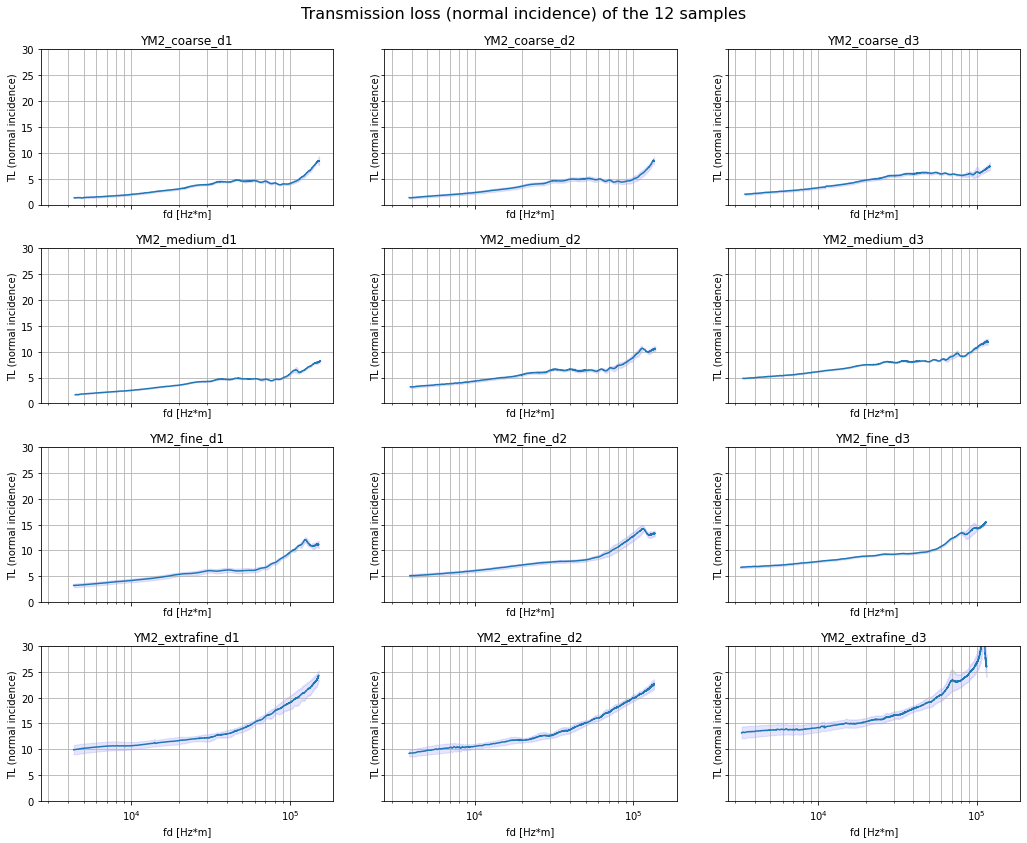

In [5]:
ncols = (samples_abs_df['density'].unique()).size   
nrows = (samples_abs_df['granul'].unique()).size  

fig, ax = plt.subplots(nrows, ncols, figsize=(15,12), sharex=True, sharey=True)
ax = ax.flatten()
fig.tight_layout(pad=3.5)


for i, axe in enumerate(ax):
    tl_data = np.array(samples_abs_df.iloc[i]['tl_avg'])    #Averages sound absorption coefficient between 3 equal samples
    tl_dev = np.array(samples_abs_df.iloc[i]['tl_std'])     #Standard deviation within 95% confidence
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
    #axe.semilogx(freq, tl_data)      #Plot over frequency*thickness
    #axe.fill_between(freq, (tl_data - tl_dev), (tl_data + tl_dev), color='b', alpha=.1)
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(fd, tl_data)      #Plot over frequency*thickness
    axe.fill_between(fd, (tl_data - tl_dev), (tl_data + tl_dev), color='b', alpha=.1)
    axe.set_title(f'{sample_name}')
    #axe.set_xlabel('Frequency [Hz]')
    axe.set_xlabel('fd [Hz*m]')
    axe.set_ylim([0, 30])
    axe.set_ylabel('TL (normal incidence)')
    axe.grid(which='both')
fig.subplots_adjust(top=0.93)
fig.suptitle('Transmission loss (normal incidence) of the 12 samples', fontsize=16)
plt.show()

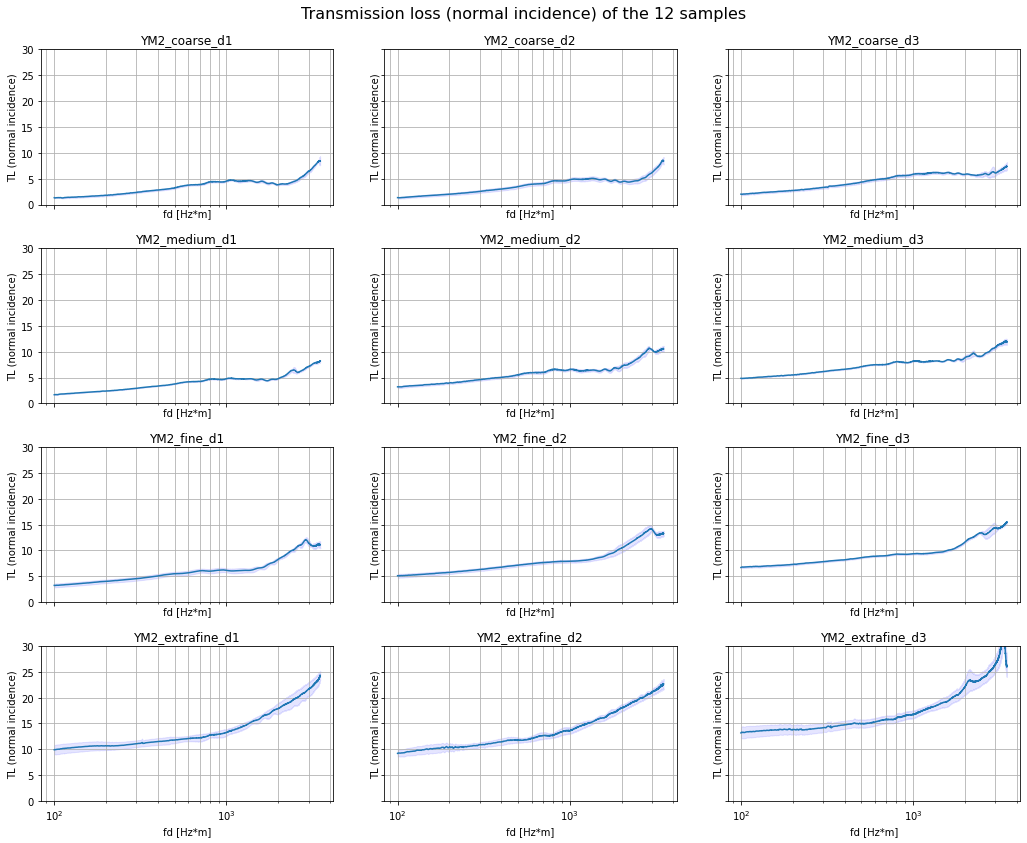

In [6]:
ncols = (samples_abs_df['density'].unique()).size   
nrows = (samples_abs_df['granul'].unique()).size  

fig, ax = plt.subplots(nrows, ncols, figsize=(15,12), sharex=True, sharey=True)
ax = ax.flatten()
fig.tight_layout(pad=3.5)


for i, axe in enumerate(ax):
    tl_data = np.array(samples_abs_df.iloc[i]['tl_avg'])    #Averages sound absorption coefficient between 3 equal samples
    tl_dev = np.array(samples_abs_df.iloc[i]['tl_std'])     #Standard deviation within 95% confidence
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
    axe.semilogx(freq, tl_data)      #Plot over frequency*thickness
    axe.fill_between(freq, (tl_data - tl_dev), (tl_data + tl_dev), color='b', alpha=.1)
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    #axe.semilogx(fd, tl_data)      #Plot over frequency*thickness
    #axe.fill_between(fd, (tl_data - tl_dev), (tl_data + tl_dev), color='b', alpha=.1)
    axe.set_title(f'{sample_name}')
    #axe.set_xlabel('Frequency [Hz]')
    axe.set_xlabel('fd [Hz*m]')
    axe.set_ylim([0, 30])
    axe.set_ylabel('TL (normal incidence)')
    axe.grid(which='both')
fig.subplots_adjust(top=0.93)
fig.suptitle('Transmission Loss (normal incidence) of the 12 samples', fontsize=16)
plt.show()